In [89]:
from torchvision import datasets
from torchvision.transforms import ToTensor #n-dimensional matrix

In [90]:
train_data = datasets.MNIST(
    root = 'data', 
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data', 
    train = False,
    transform = ToTensor(),
    download = True
)

In [91]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [92]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [93]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [94]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [95]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [96]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [97]:
train_data.targets.size()


torch.Size([60000])

In [98]:
train_data.target_transform

In [99]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data, batch_size = 100,
        shuffle = True,
        num_workers = 1
    ),

    'test': DataLoader(test_data, batch_size = 100,
        shuffle = True,
        num_workers = 1
    ),
}



In [100]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1fedae67080>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1fedae64aa0>}

In [109]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)


        


In [110]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
                  f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')


def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
          f'({100. * correct / len(loaders["test"].dataset):.0f}%)\n')



In [112]:
for epoch in range (1, 11):
    train(epoch)
    test()

Train epoch: 1 [0/60000 (0%)]	Loss: 1.555832
Train epoch: 1 [2000/60000 (3%)]	Loss: 1.525207
Train epoch: 1 [4000/60000 (7%)]	Loss: 1.513704
Train epoch: 1 [6000/60000 (10%)]	Loss: 1.499063
Train epoch: 1 [8000/60000 (13%)]	Loss: 1.544226
Train epoch: 1 [10000/60000 (17%)]	Loss: 1.606310
Train epoch: 1 [12000/60000 (20%)]	Loss: 1.543165
Train epoch: 1 [14000/60000 (23%)]	Loss: 1.522582
Train epoch: 1 [16000/60000 (27%)]	Loss: 1.544700
Train epoch: 1 [18000/60000 (30%)]	Loss: 1.476290
Train epoch: 1 [20000/60000 (33%)]	Loss: 1.511573
Train epoch: 1 [22000/60000 (37%)]	Loss: 1.489369
Train epoch: 1 [24000/60000 (40%)]	Loss: 1.505647
Train epoch: 1 [26000/60000 (43%)]	Loss: 1.533874
Train epoch: 1 [28000/60000 (47%)]	Loss: 1.526429
Train epoch: 1 [30000/60000 (50%)]	Loss: 1.560058
Train epoch: 1 [32000/60000 (53%)]	Loss: 1.543466
Train epoch: 1 [34000/60000 (57%)]	Loss: 1.516959
Train epoch: 1 [36000/60000 (60%)]	Loss: 1.480167
Train epoch: 1 [38000/60000 (63%)]	Loss: 1.495869
Train epoch

Prediction: 7


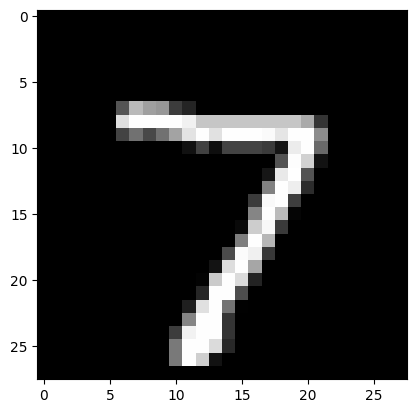

In [115]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()